In [81]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [82]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick = 'GFNORTEO.MX'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [83]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,107.489998,101.209999,102.599998,105.330002,8519758.0,99.885101
2019-03-21,105.690002,103.809998,104.610001,105.459999,5770973.0,100.008377
2019-03-22,105.889999,100.019997,104.709999,101.239998,5821815.0,96.006523
2019-03-25,105.279999,101.800003,101.809998,105.000000,4285801.0,99.572159
2019-03-26,106.139999,104.209999,104.860001,105.180000,6735171.0,99.742851


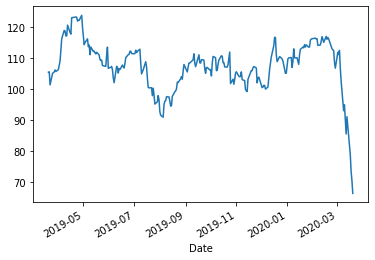

In [84]:
%matplotlib inline
data.Close.plot()

In [85]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerB_' + str(n))
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [86]:
df = BBANDS(data,20)

In [87]:
df2 = df[['Close','BollingerB_20','Bollinger%b_20']]

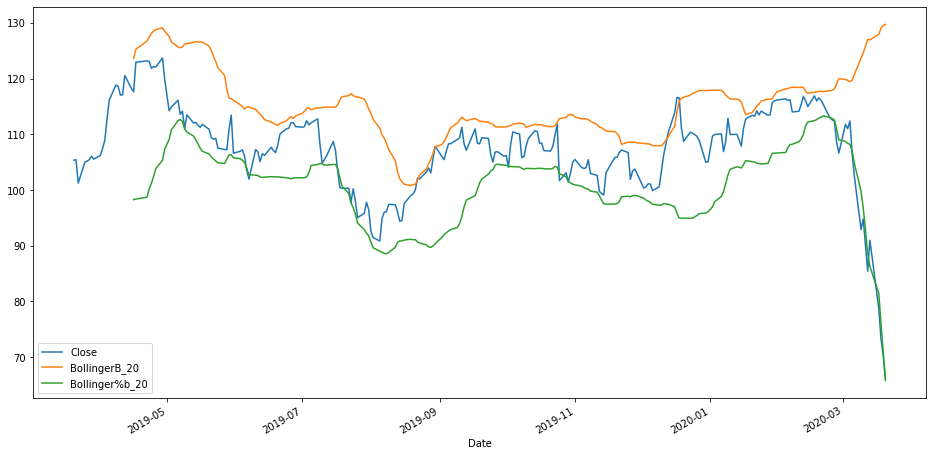

In [88]:
df2.plot(figsize = (16,8))

In [89]:
a = df['BollingerB_20']
b = df['Bollinger%b_20']

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Comportamiento'] = 'Entre bandas'
data.loc[data['Close'] <b, 'Comportamiento'] = 'Cruce de banda superior'
data.loc[data['Close'] >a, 'Comportamiento'] = 'Cruce de banda inferior'

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Recomendacion'] = '-'
data.loc[data['Close'] <b, 'Recomendacion'] = 'Se recomienda vender la accion.'
data.loc[data['Close'] >a, 'Recomendacion'] = 'Se recomienda comprar la accion'

data["Recomendacion"] = data["Recomendacion"].fillna("-")
data["Comportamiento"] = data["Comportamiento"].fillna("Sin informacion")
        

In [90]:
pd.set_option('display.max_rows', None)

In [91]:
data[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2019-03-20,105.330002,Sin informacion,-
2019-03-21,105.459999,Sin informacion,-
2019-03-22,101.239998,Sin informacion,-
2019-03-25,105.000000,Sin informacion,-
2019-03-26,105.180000,Sin informacion,-
2019-03-27,105.430000,Sin informacion,-
2019-03-28,106.059998,Sin informacion,-
2019-03-29,105.540001,Sin informacion,-
2019-04-01,106.199997,Sin informacion,-
